# Assignment 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

<ol>
    <li>Recall the velocity addition example from class: Frank is on a space station, Mary is in a spacecraft moving away from the space station in the +x direction, and she is firing a proton gun at asteroids that are in the spacecraft's path.
        <ol>
            <li>Assume the protons leave the proton gun with speed 0.99c in the +x direction. Plot the proton speed measured by <em>Frank</em> as a function of spacecraft speed relative to the space station.</li>
            <li>Now suppose the protons leave the gun in a "cone" shape rather than straight along the +x axis, so that their velocity vectors have y and z components. The angle of the proton code is $15^{\circ}$, and their launch speed is still 0.99c. Plot Frank's measurement of the y-component of the proton velocity at the edge of the cone, as a function of spacecraft speed.</li>
        </ol>
    </li>
</ol>

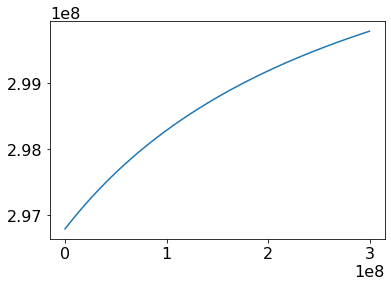

In [89]:
c = constants.c
u_prime = .99*c
v = np.linspace(0,1,1000)
def inverse_trans(u_prime,v):
  v_frank = (u_prime + v) / (1+(u_prime*v)/(c**2))
  return v_frank
plt.plot(v*c,inverse_trans(u_prime,v*c))

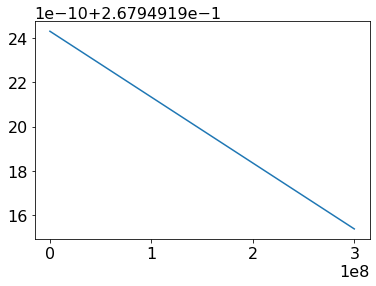

In [96]:
gamma  = 1 / np.sqrt(1 - (v**2 / c**2))
u_prime = .99*c
def inverse_y(u_prime,v):
  vy_frank = (u_prime*np.sin(np.deg2rad(15))) / (gamma *(1+(v/c**2))*u_prime*np.cos(np.deg2rad(15)))
  return vy_frank 
plt.plot(v*c,inverse_y(u_prime,v*c))

<ol start=2>
    <li>Make a 2-d plot of spacetime with $x$ on the horizontal axis and $ct$ on the vertical axis.
    <ol>
        <li>Imagine two flashbulbs positioned in the Earth's approximate rest frame with locations $x = 0$ km and $x = 300000$ km (slightly less than the moon's distance from Earth). Both bulbs flash at $t = 0$. Represent the flashes with points on your spacetime plot. Put in world lines representing travel of the light from each flash.</li>
        <li>Suppose the James Webb Space Telescope is at rest at $x = 150000$ km. Mark it on the plot with the symbol of your choice, then plot its world line.</li>
        <li>Aliens are sending a reconnaissance microprobe through the solar system at high speed. At $t = 0$, the probe is lurking at $x = 500000$ km. In the (approximate) rest frame of observers on Earth, the microprobe moves at speed $0.1c$ in the -x direction. Mark the probe's position at $t = 0$ and plot its world line.</li>
        </ol></li>
</ol>

Based only on your plot, would you say the flashes were simultaneous the point of view of the James Webb Space Telescope? What about from the point of view of the microprobe?

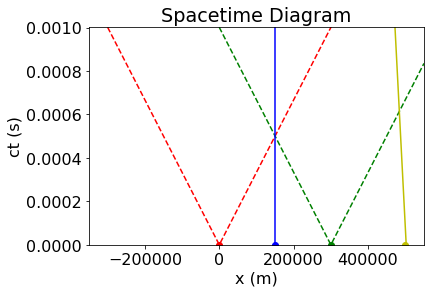

In [121]:


# Define constants

x_flash1 = 0 # km
x_flash2 = 300000 # km
x_jwst = 150000 # km

x = np.linspace(-3500000,3500000,10000)
y = x
x_micro_initial = 500000  # Initial position in km
v_micro = -0.1*c  # Speed in m/s

# Calculate Lorentz factor
gamma = 1 / np.sqrt(1 - (v_micro/c)**2)

# Time array
t = np.linspace(0, 3000000, 10000)  # Time in seconds

# Calculate probe's position at different times
x_micro = gamma * (x_micro_initial + v_micro*t)


# Plot flashbulbs
plt.plot([x_flash1], [0], 'ro', label='Flashbulb 1')
plt.plot([x_flash2], [0], 'go', label='Flashbulb 2')
# Plot James Webb Space Telescope
plt.plot([x_jwst], [0], 'bo', label='James Webb Space Telescope')
# Plot of the microprobe
plt.plot([500000], [0], 'yo', label='Microprobe')

# Plotting the 45 degree world lines
plt.plot(x,np.abs(y)/c, 'r--', label = 'Flashblub 1')
plt.plot(x+300000,np.abs(y)/c, 'g--', label = 'Flashblub 2')
plt.axvline(x=150000, color='b')

# Plot probe's world line
plt.plot(x_micro, t, 'y', label='Microprobe')



# Set axis labels and title
plt.xlabel('x (m)')
plt.ylabel('ct (s)')
plt.title('Spacetime Diagram')

# Set axis limits
plt.xlim(-350000,550000)
plt.ylim(0,300000/c)

# Add legend
#plt.legend()

# Show plot
plt.show()


From the frame of reference of the James Web Space Telescope, both flashs occurred at the same time. This is because the world  lines of both flashes and the JWST all intersect at the same time on the verticle axis. For the microprobe, the world line from the second blub reaches the probe faster than the blub from the Earth. This is depicted by the world line of the green line (blulb 2) intersecting the world line of the microprobe lower on the time axis than where flash 1 on Earth reaches the microprobe world line. 